# Clustrring 
---
---

#### Imports

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score

In [39]:
#TODO:
# 1. Add path to data
# 2. Elbow method for KMeans
# 3. Silhouette score for KMeans
#4. Plot clusters
# 5. plot radar chart for clusters

In [40]:
# 1. Add path to data
df = pd.read_csv('/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Clustering-/Transactions/transactions_scaled.csv')

In [41]:
df.head()

,acct_nbr,sum_tran_amt,number_of_transactions
0,13630842,1.032618,1.119723
1,13631412,-0.258770,1.230734
2,13625032,-0.149983,1.193730
3,13631642,-0.138309,1.452755
4,4561143213634590,-0.502117,-0.730457


In [42]:
# create

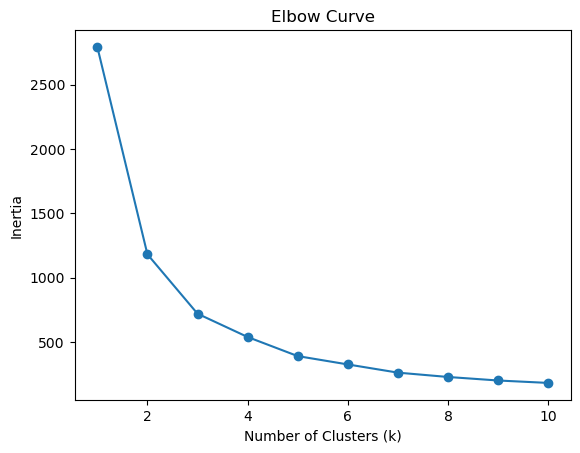

In [43]:
#2. Elbow method for KMeans

# # # Test for number of clusters using the elbow method
X = df[['number_of_transactions','sum_tran_amt']]

inertia = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [44]:
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))

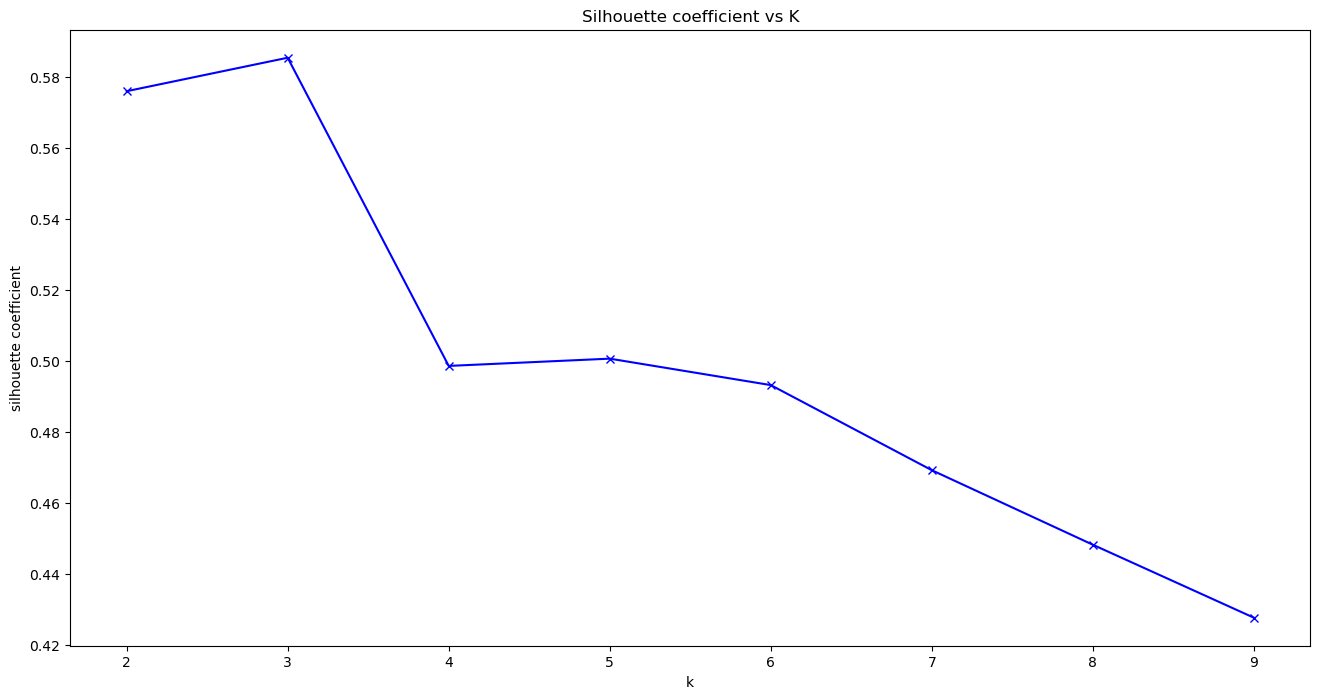

In [45]:
# plot the silhouettes
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [46]:
# plot cluster function 
def plot_clusters(X, y_res, plt_cluster_centers=False):
    # create scatter plot for samples from each cluster
    X_centroids = []
    for cluster in set(y_res):
        indices = np.where(y_res == cluster)[0]
        x = X.iloc[indices, 0]
        y = X.iloc[indices, 1]
        X_centroids.append(np.mean(x))
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    
    # plot cluster centers (centroids)
    if plt_cluster_centers:
        centroids_x = X_centroids
        centroids_y = [np.mean(X.iloc[np.where(y_res == cluster)[0], 1]) for cluster in set(y_res)]
        plt.scatter(centroids_x, centroids_y, marker='*', color='red', label='Centroids', s=100)
    

    plt.legend()
    plt.grid()
    plt.show()

In [47]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

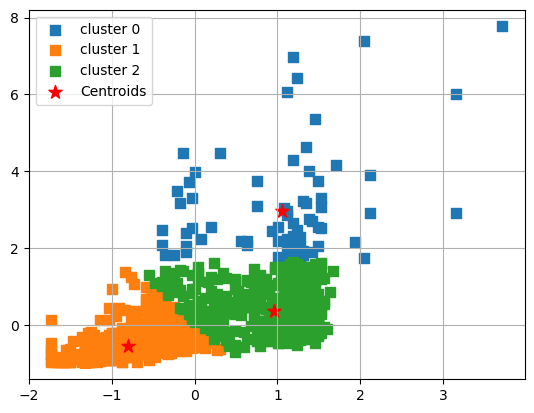

In [48]:
plot_clusters(X, y_km, plt_cluster_centers= True)

In [49]:
df.head()

,acct_nbr,sum_tran_amt,number_of_transactions
0,13630842,1.032618,1.119723
1,13631412,-0.258770,1.230734
2,13625032,-0.149983,1.193730
3,13631642,-0.138309,1.452755
4,4561143213634590,-0.502117,-0.730457


In [50]:
# drop acct_nbr column
df = df.drop(['acct_nbr'], axis=1)


In [51]:
#Radar plot

#Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = df.columns

# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster 
for i in range(3):
    # Select column values in df_scaled
    radius = df.loc[i].values

# Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
    polar=dict (  radialaxis = dict (visible = True)  ),
    showlegend=True
        )

chart.show()

In [52]:
# plot radar plot for each cluster
def plot_radar(df, cluster):
    # Plot features (columns) as theta (angle). Use the data grouped by the clusters
    
    angle = df.columns

    # Initialize plot/figure
    chart = go.Figure()

    # Select column values in df_scaled
    radius = df.loc[cluster].values

    # Plot values
    chart.add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {cluster}'
            )
        )

    # Add labels etc
    chart.update_layout(
        polar=dict (  radialaxis = dict (visible = True)  ),
        showlegend=True
        )

    chart.show()

In [53]:
plot_radar(df, 0)

### Principal Component Analysis (PCA)
---

In [54]:
# Reduce dimensionality with PCA to 4 components and plot the clusters in seaborn
pca = PCA(n_components=None)
dfx_pca = pca.fit(df)

# Visualize PCA components


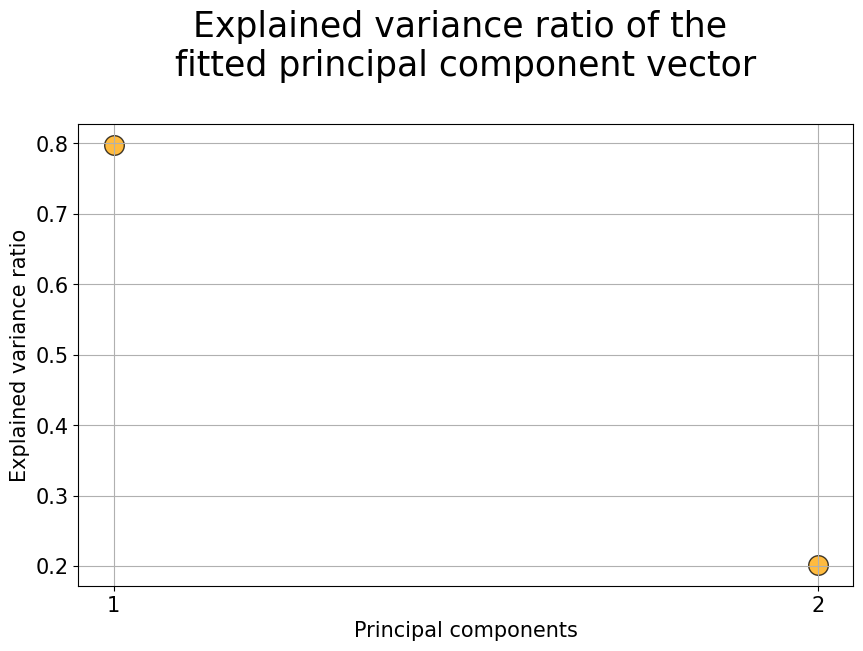

In [55]:
# plot explianed variance ratio
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [66]:
pca.explained_variance_ratio_

array([0.79806798, 0.20193202])

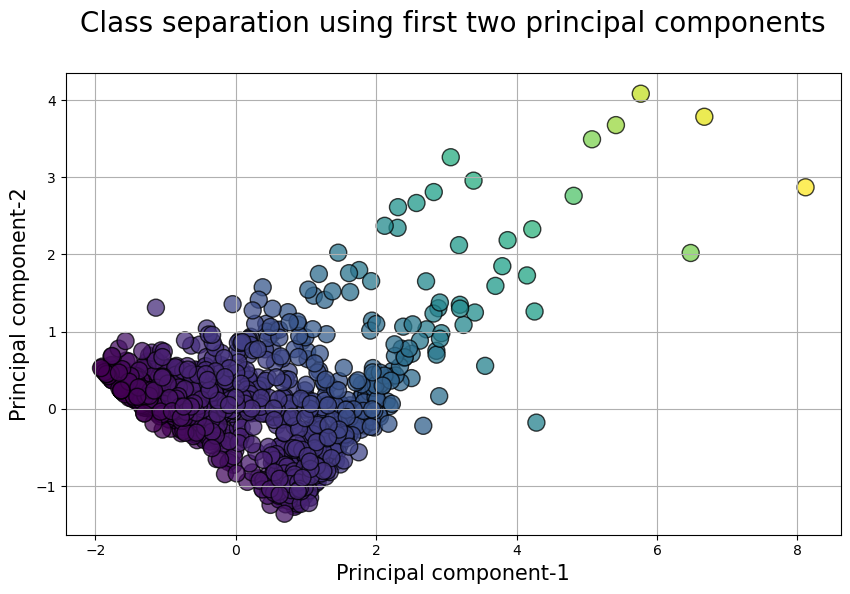

In [57]:
dfx_trans = pca.transform(df)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['sum_tran_amt'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

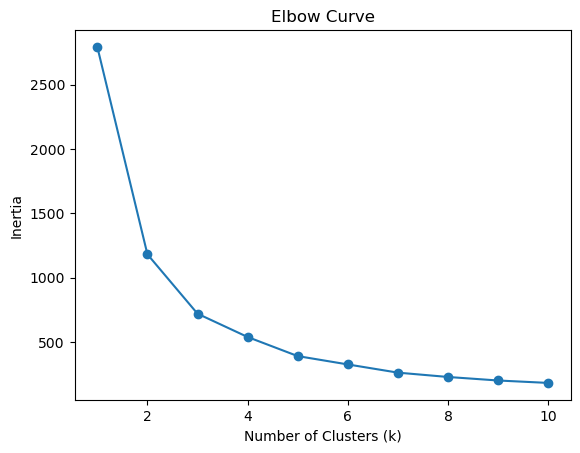

In [101]:
inertia = []
k_values = range(1, 11) 
T = pca.transform(df) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(T)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [102]:
# check silhouette score
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(T)
    label=kmeanModel.predict(T)
    silhouettes.append(silhouette_score(T,label))

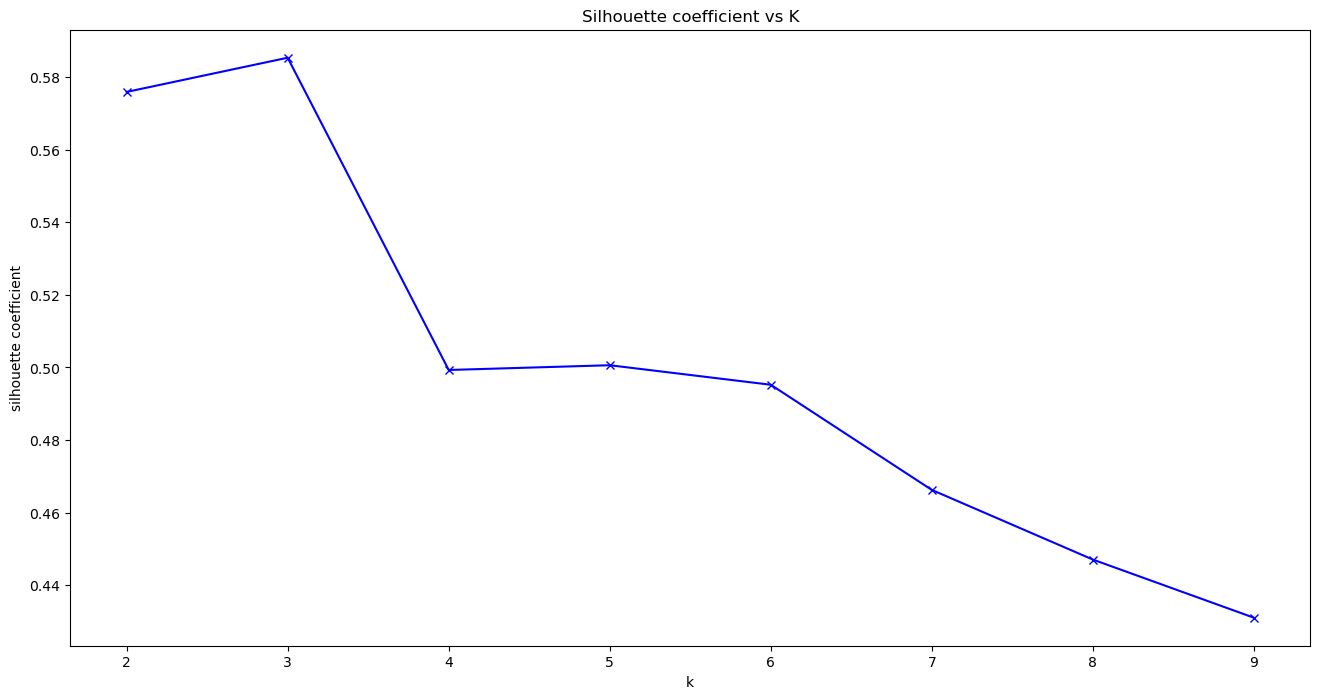

In [103]:
# plot the silhouettes
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [58]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

In [59]:
labels = km.fit_predict(pca.transform(df))

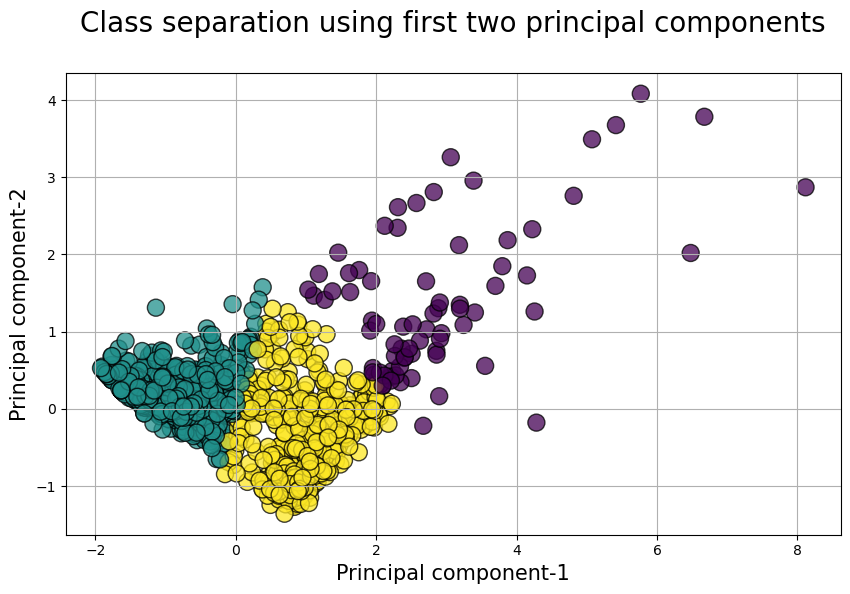

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=labels,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [105]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [98]:
def plot_clusters_(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


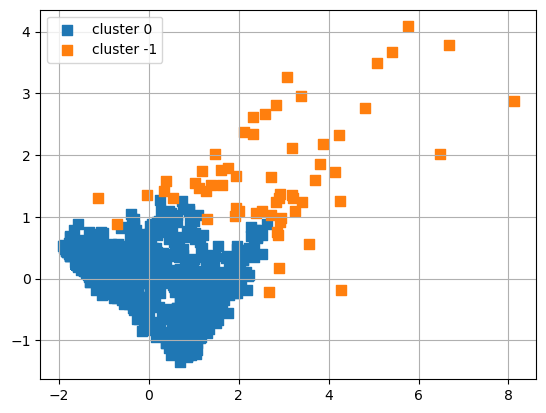

In [99]:
# Clustering with DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
T = pca.transform(df) 
y_db = db.fit_predict(T)

# plot DBSCAN clusters
plot_clusters_(T,y_db)

In [90]:
import scipy.cluster.hierarchy as sch

In [91]:
# Cluster with Hierarchical clustering, plot dendrogram.
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

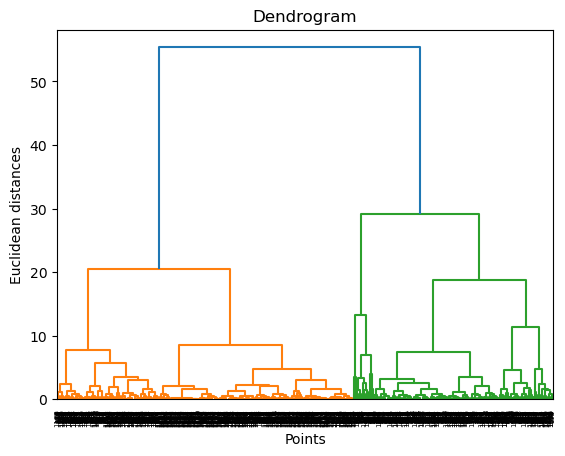

In [92]:
plot_dendrogram(T)

In [94]:
# Algrometrive clustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

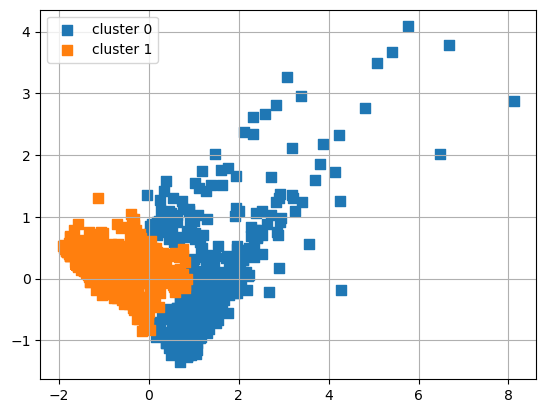

In [100]:
y_hc = ac.fit_predict(T)
plot_clusters_(T,y_hc)